Provide the distance graph file
USA-road-d.CAL.gr
Provide the time graph file
USA-road-t.CAL.gr
Enter the input node
477
Enter the distance threshold
5
finding the neighbour nodes at a distance 5 from the node 477
['1048956', '476', '1048957', '516', '486', '1048962', '1048989', '1048979', '514', '1048961', '481', '477', '1048959', '425', '480', '482', '1048958', '478', '1048960']
[['1048957', '477'], ['476', '1048957'], ['1048956', '476'], ['477', '1048956'], ['1048957', '477'], ['1048957', '477'], ['477', '1048956'], ['1048957', '477'], ['1048957', '477'], ['1048956', '476'], ['477', '1048956'], ['1048957', '477'], ['1048957', '477'], ['477', '1048956'], ['1048957', '477'], ['1048957', '477'], ['1048958', '476'], ['478', '1048958'], ['1048959', '478'], ['1048959', '478'], ['481', '478'], ['481', '478'], ['478', '1048958'], ['1048959', '478'], ['1048959', '478'], ['481', '478'], ['481', '478'], ['1048962', '1048958'], ['1048979', '1048962'], ['1048979', '1048962'], ['1048962', '104895

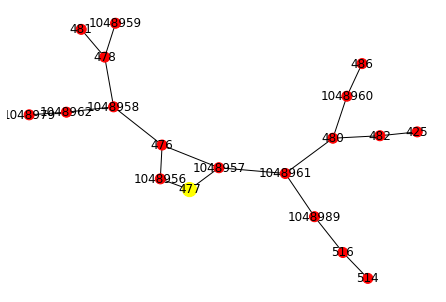

In [4]:

# import pacakges
import networkx as nx
import matplotlib.pyplot as plt

# Global variables to hold the graph data
tree = [[]]
neighbour_node = []
edges_dist_cost = []
edges_time_cost = []
graph_edges = []
input_node = 4
dist_threshold = 2
dist_graph_file,time_graph_file,coor_file=(None,)*3

# Recursive function to print the neighbor nodes of a node until dist distance
def find_neighbour(dist, node, parent):
    global neighbour_node, graph_edges
    # Base condition dist should be greater than 0
    if (dist < 0):
        return
    edge1 = []
    if parent != -1:
        edge1.append(str(node))
        edge1.append(str(parent))
        graph_edges.append(edge1)
    # print (edge1)
    neighbour_node.append(str(node))
    # Traverse the connected nodes/adjacency list
    for i in tree[node]:

        if (i != parent):
            # node i becomes the parent of its child node
            find_neighbour(dist - 1, i, node)


# to prepare the adjacent matrix
def node_under_dis(graph, node, dist, v, e):
    for i in range(e):
        fro = graph[i][0]
        to = graph[i][1]
        # if edges_dist_cost[i]>1000:
        tree[fro].append(to)
        tree[to].append(fro)

    find_neighbour(dist, node, -1)


# to form the graph
def create_graph():

    global tree, neighbour_node, edges_dist_cost, edges_time_cost, input_node
    stat = "finding the neighbour nodes at a distance " + str(dist_threshold) + " from the node " + str(input_node)
    print(stat)
    node_id_total = []
    edges = []

    with open(dist_graph_file, "r") as f:
        dist_data = f.readlines()
    for lines in dist_data:
        current_edges = []
        if "a" in lines.split(' ')[0]:
            node_id_total.append(int(lines.split(' ')[1]))
            node_id_total.append(int(lines.split(' ')[2]))
            current_edges.append(int(lines.split(' ')[1]))
            current_edges.append(int(lines.split(' ')[2]))
            edges.append(current_edges)
            edges_dist_cost.append(int(lines.split(' ')[3]))
    with open(time_graph_file, "r") as f:
        dist_data = f.readlines()
    for lines in dist_data:
        if "a" in lines.split(' ')[0]:
            edges_time_cost.append(int(lines.split(' ')[3]))
    node_id = list(set(list(node_id_total)))
    # print (len(node_id))
    # print(edges[0])
    # print (len(edges))
    # print (max(node_id))
    tree = [[] for i in range(max(node_id) + 1)]
    node_under_dis(edges, input_node, dist_threshold, len(node_id), len(edges))
    neighbour_node = (list(set(list(neighbour_node))))
    print(neighbour_node)
    print(graph_edges)


def draw_graph():
    print ('Generating the graph....')
    global neighbour_node, graph_edges, input_node
    graph1 = nx.Graph()
    nodes_color = []
    nodes_size = []
    # graph1.add_node(str(input_node))
    for item in neighbour_node:
        if item == str(input_node):
            nodes_color.append('yellow')
            nodes_size.append(200)
        else:
            nodes_color.append('red')
            nodes_size.append(100)
    print (nodes_color)
    graph1.add_nodes_from(neighbour_node, color='red')
    graph1.add_edges_from(graph_edges, color='red')
    nx.draw(graph1, node_color=nodes_color, node_size=nodes_size, with_labels=True)
    # plt.savefig("path_graph1.png")
    plt.show()


if __name__== "__main__":
    print ("Provide the distance graph file")
    dist_graph_file=input()
    print ("Provide the time graph file")
    time_graph_file=input()
    print("Enter the input node")
    input_node = int(input())
    print("Enter the distance threshold")
    dist_threshold=int(input())
    create_graph()
    draw_graph()